In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.drop(columns='Id',inplace=True)

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [11]:
X = df.drop(columns='Species',axis=1)
y = df['Species']

In [12]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


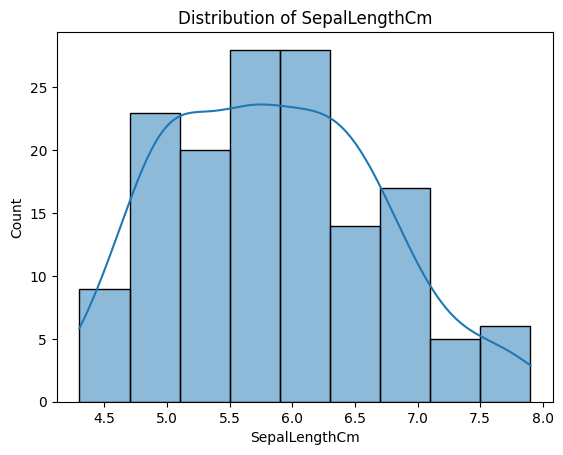

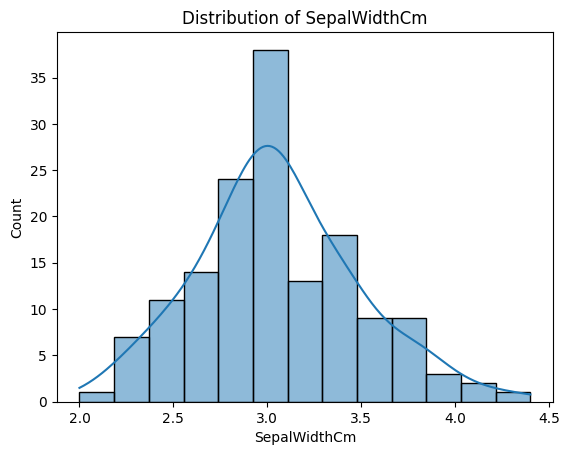

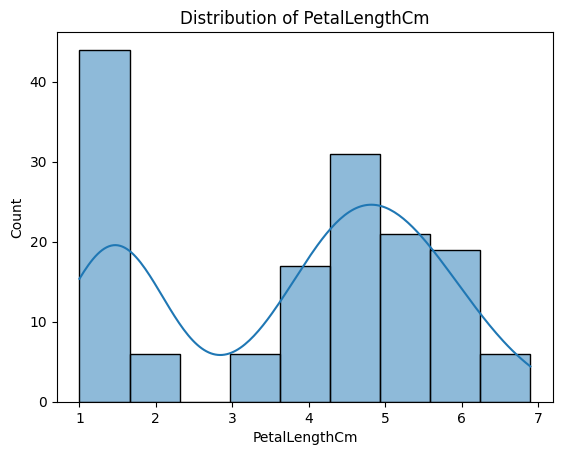

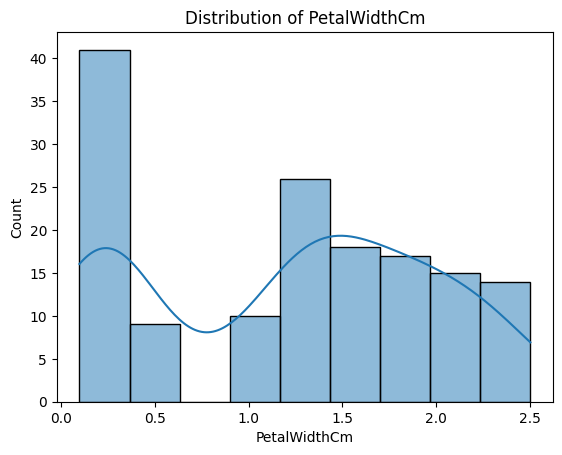

--------------------------------------------------


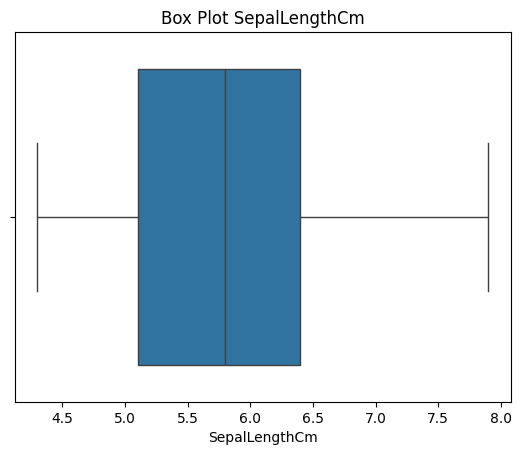

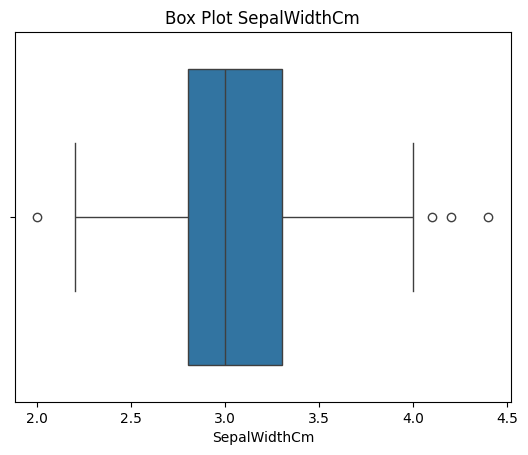

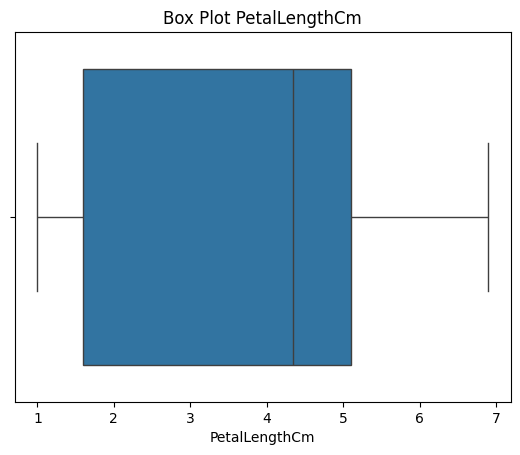

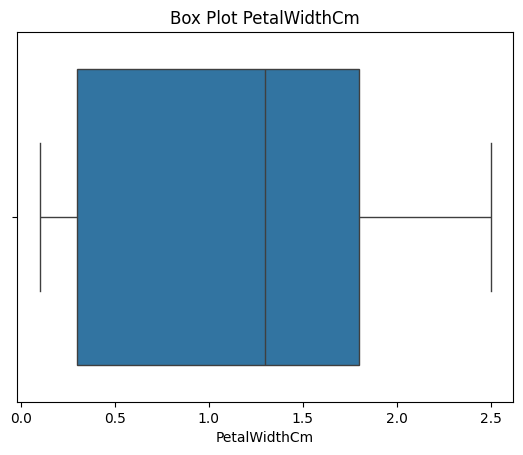

--------------------------------------------------


In [14]:
for col in X:
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

print('-'*50)

for col in X:
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot {col}")
    plt.show()


print('-'*50)









In [15]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [17]:
X_train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [18]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']



col_preprocess = ColumnTransformer(
    transformers= [
        ('robust',RobustScaler(),['SepalWidthCm']),
        ('scalar',StandardScaler(),columns),


    ],remainder='passthrough'
)

In [19]:
from math import remainder
from sklearn.pipeline import Pipeline

pipeline_pre = Pipeline(
    steps=[
        ('preprocess',col_preprocess)
    ]
)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib


algorithms = {
    "random_forest":RandomForestClassifier(),
    "decision_tree": DecisionTreeClassifier(),
    "svm": SVC(),

}

results = {}
pipeline_results = {}


for name,algo in algorithms.items():
    piepline = Pipeline(
        steps= [
            ('piepline',pipeline_pre),
            ('algo',algo)

        ]
    )

    piepline.fit(X_train,y_train)

    joblib.dump(piepline,f"{name}.pkl")
    pipeline_results[name] = piepline

    y_pred = piepline.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    clf_report = classification_report(y_test,y_pred)
    cf_matrix = confusion_matrix(y_test,y_pred)
    cv_score = cross_val_score(piepline,X_train,y_train,scoring='accuracy',cv=5)
    cv_mean = cv_score.mean()

    # Initialize feature importance as None
    feature_importance = None

    # Extract feature importance for supported models
    if name in ["random_forest", "decision_tree"]:
        feature_importance = algo.feature_importances_
    elif name == "svm" and hasattr(algo, 'coef_'):
        feature_importance = algo.coef_

        

    results[name]  = {
        "accuracy": accuracy,
        "clf_report": clf_report,
        "cf_matrix": cf_matrix,
        "cv_score": cv_score,
        "cv_mean": cv_mean,
        "feature_importance": feature_importance,


    }

    print(f"{name}")
    print(f"Accuracy: {accuracy}")
    print(f"CLF Report: \n{clf_report}")
    print(f"CF Matrix: \n{cf_matrix}")
    print(f"CV: {cv_score}")
    print(f"CV_mean: {cv_mean}")
    if feature_importance is not None:
        print(f"Feature Importance: {feature_importance}")
    print('-'*50)


random_forest
Accuracy: 1.0
CLF Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

CF Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
CV: [0.95833333 0.95833333 0.83333333 1.         0.95833333]
CV_mean: 0.9416666666666667
--------------------------------------------------
decision_tree
Accuracy: 1.0
CLF Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00    

In [27]:
joblib.load('svm.pkl')

new_data = {
    'SepalLengthCm':6,
    'SepalWidthCm':9,
    'PetalLengthCm': 3,
    'PetalWidthCm': 0.5

}

new_data = pd.DataFrame([new_data])

columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

new_data = new_data[columns]

predict = piepline.predict(new_data)

print(predict[0])

Iris-virginica


In [25]:
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6,9,3,0.5


In [22]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
